# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np
df = pd.read_csv('data/human_body_temperature.csv')

In [2]:
# Your work here.
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


### Check whether the tempearture data follows Normal Distribution

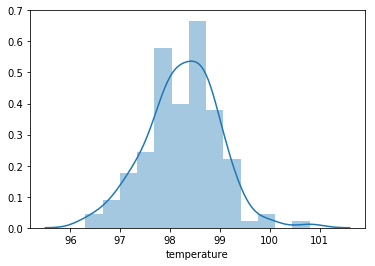

In [3]:
df_temp = df['temperature']
sns.distplot(df_temp)

From the plot above the temperature distribution seems to be normal as the tails are short, and exponential decreases can be observed in both ways.
To confirm further, let's use "stats.normaltest" to test whether it is normal distribution or not.
Null Hypothesis : Distribution is Normal
Alternative Hypothesis : Distribution isn't Normal

In [5]:
stats.normaltest(df_temp)

NormaltestResult(statistic=2.7038014333192031, pvalue=0.2587479863488254)

#### Conclusions :

From the plot, the distribution is having bell shape with short tails and exponential decrease as moving away from the mean
value. To add solid evidence further, observing the p-value calculated using stats.normaltest is 0.258(approx) which is 
greater than 0.05 and this gives strong evidence to accept the Null Hypothesis(Distribution is Normal) that the temperature data distribution is Normal and the sample exactly represents the population.

#### Is the sample size large & Observations are Independent?

In [6]:
len(df_temp)

130

The number of samples to satisfy the Central Limit Theorem have to be greater than 30, we have samples of 130 which are greater than 30. So the Observations are independent & the size of sample is large.

#### Is the true population mean really 98.6 degrees F? 

In [40]:
population_mean_mu = 98.6
sample_std = df_temp.std()
sample_mean = df_temp.mean()
n = len(df_temp) #sample size
SE = sample_std/np.sqrt(n)
print("Population's Mean : ",population_mean_mu)
print('Sample Mean : ',sample_mean)
print('Sample Std : ',sample_std)
print("Sample_Size : ",n)
print("Standard Error : ",SE)

Population's Mean :  98.6
Sample Mean :  98.24923076923078
Sample Std :  0.7331831580389454
Sample_Size :  130
Standard Error :  0.0643044168379


#### Form Hypothesis

#### First Let's try with One-Sided Test

Null Hypothesis : $H_{0}$ ==> True population mean = 98.6
    
Alternative Hypothesis : $H_{A}$ ==> True population mean != 98.6
    
alpha = 0.05 => Significance level

X ~ N(mean = 98.6, SE=0.064)

In [43]:
Zscore = np.float32(population_mean_mu - sample_mean)/SE
print("Zscore : ", Zscore)

Zscore :  5.45482315261


As the sample size is 130 which is greater than 30, satisfying the condition of Central Limit Theorem, we can use z-score as test statistic.

#### Find P_Value

In [44]:
from scipy import stats
P_value = (1 - stats.norm.cdf(abs(Zscore))) * 2
print("P_value : ",P_value)

P_value :  4.90216087723e-08


Assumed significance level for P-Value to be 0.05. As the P-Value is less than 0.05, this provides strong evidence against 
Null Hypothesis $H_0$. So, the true Population Mean is not 98.6.

### What is the Abnormal Temperature ?
#### Calculate Margin Error & Confidence Interval to find Abnormal Temperature

##### Margin Error

In [90]:
zScore = stats.norm.ppf(0.95)
Margin_Error = (zScore) * SE
print("Margin Error : ", Margin_Error)

Margin Error :  0.105771353265


In [91]:
# Confidence Interval
lower_limit = sample_mean - Margin_Error
upper_limit = sample_mean + Margin_Error
print("Confidence Interval : ({0},{1})".format(lower_limit,upper_limit))

Confidence Interval : (98.14345941596598,98.35500212249558)


#### Temperatures that fall below 98.14 and above the 98.35 of the Confidence Interval are considered to be abnormal

### Is there any significant difference between Normal Temperature of male and female

In [52]:
df_male_temp = df[df['gender'] == 'M']['temperature']
df_female_temp = df[df['gender'] == 'F']['temperature']

In [53]:
df_male_temp.head()

2     97.8
5     99.2
6     98.0
7     98.8
12    98.2
Name: temperature, dtype: float64

In [54]:
df_female_temp.head()

0    99.3
1    98.4
3    99.2
4    98.0
8    98.4
Name: temperature, dtype: float64

In [55]:
male_mean_temp = df_male_temp.mean()
female_mean_temp = df_female_temp.mean()
print("Male Normal Mean Temperature", male_mean_temp)
print("Female Normal Mean Temperature", female_mean_temp)

Male Normal Mean Temperature 98.1046153846154
Female Normal Mean Temperature 98.39384615384613


In [58]:
actual_mean_temp_diff = female_mean_temp - male_mean_temp
print("Difference between male and female temperatures : ", actual_mean_temp_diff)

Difference between male and female temperatures :  0.289230769230727


#### For  this will try the sampling method as the we want to check the difference of means.

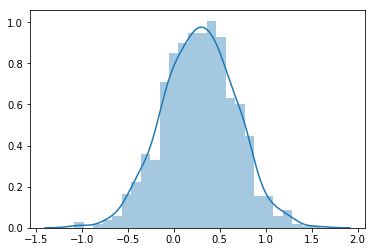

In [73]:
import seaborn as sns
mean_diff_samples = []
for i in range(1000):
    male_sample = df_male_temp.sample(frac=0.1)
    female_sample = df_female_temp.sample(frac=0.1)
    mean_sample_diff = (female_sample.mean() - male_sample.mean())
    mean_diff_samples.append(mean_sample_diff)
sns.distplot(mean_diff_samples)

#### From the plot above of sampled mean differences, it turns out to be normal distribution. 


### Using Two-Sample Test

#### Null Hypothesis : $H_{0}$ : There is no significant difference between in normal temperatures of male & female(mean_diff_mu = 0)
#### Alternative Hypothesis : $H_{A}$ : There is a significant difference (mean_diff_mu  !=  0)

##### alpha = 0.05

##### Using Two-Sample test as we are comparing the means of two different groups

Lets assume mean_diff = 0 in null hypothesis and to be be true and check whether this will satisfy to accept null hypothesis

In [86]:
mean_diff_mu = 0
print("Actual Mean Diff : ",actual_mean_temp_diff)
SE_diff = (df_female_temp.std() - df_male_temp.std()) / np.sqrt(len(df_female_temp))
print("Standard Error Diff : ",SE_diff)

Actual Mean Diff :  0.289230769230727
Standard Error Diff :  0.0055483205575


In [87]:
Zscore = (actual_mean_temp_diff - mean_diff_mu) / SE_diff
print("Zscore : ",Zscore)

Zscore :  52.1294265955


In [88]:
p_Value = (1 - stats.norm.cdf(abs(Zscore))) * 2
print("p_Value : ",p_Value)

p_Value :  0.0


#### As p_Value is < 0.05, this provides strong evidence against Null Hypothesis and we reject the Null Hypothesis.

##### So there is a significant difference between normal tempereatures of male and female

### Conclusions

1.) The sample distribution of temperatures follow normal distribution

2.)The samples are independent satisfying the Central Limit Theorem.

3.) By using one-sided test & Z-score the null hypothesis(that true mean population temperature is 98.6) is rejected

4.)Temperatures that fall below 98.14 and above the 98.35 of the Confidence Interval are considered to be abnormal and this is known by using Confidence Intervals and Margin Error.

5.)By using Two sided test & Zscore, it is known that normal temperatures of male and female are significantly different.
